##Credit Card Fraud Detection Project using Logistic Regression

###Introduction

><p align= "justify">With the advancement of technology and the increasing use of credit cards for financial transactions, fraud detection has become a significant concern. The application of machine learning techniques offers an effective approach to identifying complex patterns in large data sets, enabling the creation of robust predictive models. This project aims to develop a Logistics Regression model for detecting fraud in credit card transactions.

###Project Objective

><p align= "justify">The main objective of this project is to create a Logistic Regression model capable of distinguishing between legitimate and fraudulent transactions based on a credit card transaction database. Logistic Regression is a technique suitable for binary classification problems, making it a natural choice for fraud detection.

###Project Conclusion

><p align= "justify">Even though training on unbalenced data results in a model 3% more accurate, training on balanced data proved to be 11% more accurate when it comes to identify fraudlent transactions when tested on real data.

###Dataset

><p align= "justify">For this project, we will use a dataset containing information about credit card transactions. Each entry in the dataset represents a transaction, and variables include information such as transaction amount, time, location, and so on. The dataset will also include a response variable indicating whether the transaction was fraudulent or legitimate.

In [ ]:
import pandas as pd
import seaborn as sns
import plotly.express as px
from sklearn.utils import resample
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant
from statsmodels.stats.outliers_influence import variance_inflation_factor
import numpy as np
from sklearn.model_selection import train_test_split
from statsmodels.tools.tools import add_constant
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import gdown

##Start of code:
> The code downloads a CSV file from Google Drive. First, the file URL is generated using the provided ID. Then the file is downloaded locally with the name 'data.csv' using the gdown library. Finally, the code uses pandas to read the CSV file and create a DataFrame called df, facilitating data manipulation and analysis.



In [ ]:
#df = pd.read_csv('./card_transdata.csv')


file_id = "1QAY87TxlnDHfnWadOf4fi0vVUp71a4WQ"
url = f'https://drive.google.com/uc?id={file_id}'
output = 'data.csv'
gdown.download(url, output, quiet=False)
df = pd.read_csv('data.csv')

Downloading...
From: https://drive.google.com/uc?id=1QAY87TxlnDHfnWadOf4fi0vVUp71a4WQ
To: /content/data.csv
100%|██████████| 76.3M/76.3M [00:01<00:00, 39.0MB/s]


In [ ]:
df.shape

(1000000, 8)

In [ ]:
df.head()

distance_from_home  distance_from_last_transaction  \
0           57.877857                        0.311140   
1           10.829943                        0.175592   
2            5.091079                        0.805153   
3            2.247564                        5.600044   
4           44.190936                        0.566486   

   ratio_to_median_purchase_price  repeat_retailer  used_chip  \
0                        1.945940              1.0        1.0   
1                        1.294219              1.0        0.0   
2                        0.427715              1.0        0.0   
3                        0.362663              1.0        1.0   
4                        2.222767              1.0        1.0   

   used_pin_number  online_order  fraud  
0              0.0           0.0    0.0  
1              0.0           0.0    0.0  
2              0.0           1.0    0.0  
3              0.0           1.0    0.0  
4              0.0           1.0    0.0

## Variables:

> **distance_from_home** is a numerical discrete variable

>**distance_from_last_transaction** is a numerical discrete variable

>**ratio_to_median_purchase_price** is a numerical discrete variable

>**repeat_retailer** is a binary variable

>**used_chip** is a binary variable

>**used_pin_number** is a binary variable

>**online_order** is a binary variable

>**fraud** is a binary variable





In [ ]:
df.isnull().sum()

distance_from_home                0
distance_from_last_transaction    0
ratio_to_median_purchase_price    0
repeat_retailer                   0
used_chip                         0
used_pin_number                   0
online_order                      0
fraud                             0
dtype: int64

In [ ]:
df = df.dropna()

In [ ]:
df.isnull().sum()

distance_from_home                0
distance_from_last_transaction    0
ratio_to_median_purchase_price    0
repeat_retailer                   0
used_chip                         0
used_pin_number                   0
online_order                      0
fraud                             0
dtype: int64

##Correlation:

> This code below uses the seaborn library to create a heatmap of the DataFrame df correlation matrix. The df.corr() function calculates the correlations between the DataFrame columns, and sns.heatmap is responsible for visualizing these correlations in the form of colors.



<Axes: >

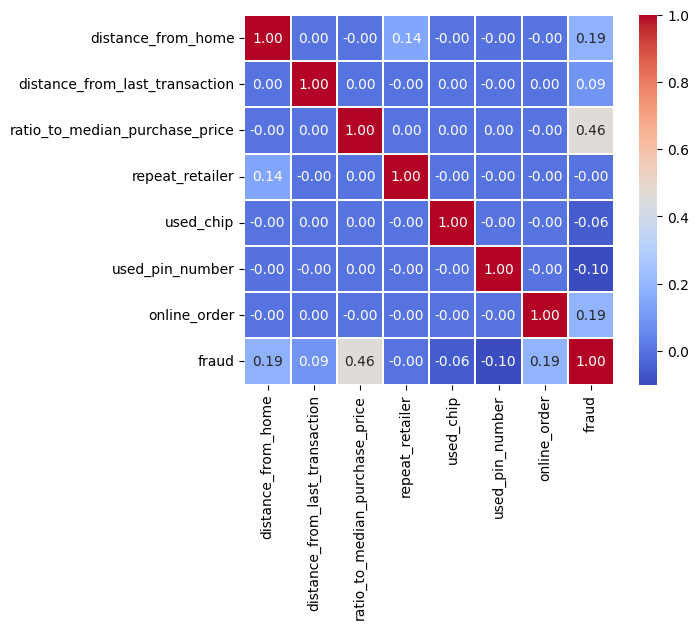

In [ ]:
sns.heatmap(df.corr(), cmap='coolwarm', fmt='.2f', linewidths=0.1, vmax=1.0, square=True, linecolor='white', annot=True)

Uneven distribution between fraud and legit operations, hence resample needed.

In [ ]:
px.pie(df, names='fraud')

##Base balancing:
>This code snippet below performs a class balancing procedure on a data set where the 'fraud' column indicates the presence or absence of fraud. Initially, the code divides the original DataFrame (df) into two subsets: df_majority containing the instances where 'fraud' is equal to 0, and df_minority containing the instances where 'fraud' is equal to 1.

>Next, the majority subset (df_majority) is downsampled to match the number of instances to the minority subset (df_minority). This process is carried out using the resample method, with replace=False indicating that sampling is done without replacement, n_samples=len(df_minority) defining the number of samples to be generated, and random_state=42 setting the seed to guarantee reproducibility.

>DataFrame resulting from balancing is then created by concatenating the df_majority_downsampled and df_minority DataFrames.

In [ ]:
df_majority = df[df['fraud'] == 0]
df_minority = df[df['fraud'] == 1]
df_majority_downsampled = resample(df_majority, replace=False, n_samples=len(df_minority), random_state=42)
df_balanced = pd.concat([df_majority_downsampled, df_minority])
px.pie(df_balanced, names='fraud')

##Logistics Rules:
>This code snippet below performs logistic regression modeling using the statsmodels library.
After fitting the model to data from the df_balanced DataFrame, the model summary is printed using print(model.summary()). This summary provides detailed statistical information about the coefficients, fit statistics, and statistical significance of the independent variables in the context of the logistic regression model.

In [ ]:
formula = 'fraud ~ distance_from_home + distance_from_last_transaction + ratio_to_median_purchase_price + repeat_retailer + used_chip + used_pin_number + online_order'
model = smf.glm(formula=formula, data=df_balanced, family=sm.families.Binomial()).fit()
print(model.summary())


                 Generalized Linear Model Regression Results                  
Dep. Variable:                  fraud   No. Observations:               174806
Model:                            GLM   Df Residuals:                   174798
Model Family:                Binomial   Df Model:                            7
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -36852.
Date:                Tue, 19 Dec 2023   Deviance:                       73704.
Time:                        23:31:31   Pearson chi2:                 1.61e+17
No. Iterations:                    10   Pseudo R-squ. (CS):             0.6189
Covariance Type:            nonrobust                                         
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept   

##Analysis of the Summary above:
>After analysis we were able to observe that all variables have a value less than 0.05 and are therefore significant for the base.
##Subset correlation:
>The code below extracts a specific subset of variables from the df_balanced DataFrame and calculates the correlation matrix between these variables.
>And checking the high relationship between the independent variables > 7.

<Axes: >

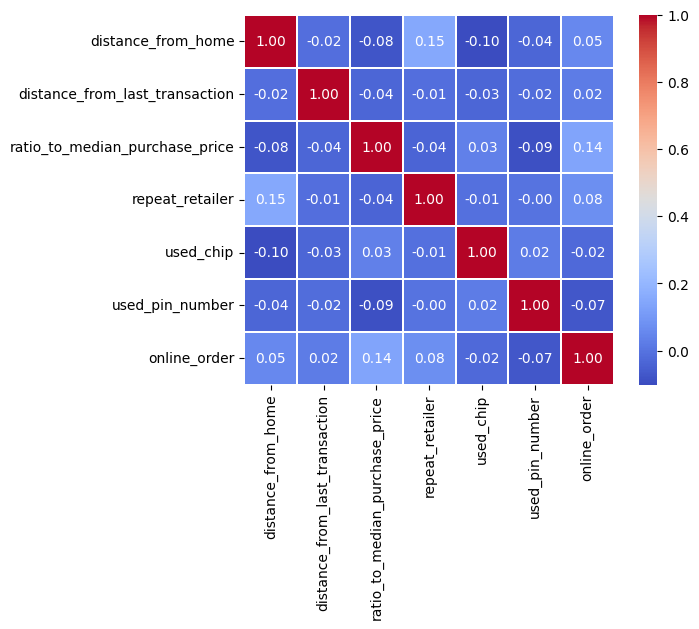

In [ ]:
variables = df_balanced[['distance_from_home', 'distance_from_last_transaction', 'ratio_to_median_purchase_price', 'repeat_retailer', 'used_chip', 'used_pin_number', 'online_order']]
correlations = variables.corr()
sns.heatmap(correlations, cmap='coolwarm', fmt='.2f', linewidths=0.1, vmax=1.0, square=True, linecolor='white', annot=True)

##Variance Inflation Value:
>Below we can show the Vif of each of the variables, remembering that if this value is greater than 5 it indicates significant multicollinearity.

In [ ]:
vif = add_constant(variables)
pd.Series([variance_inflation_factor(vif.values, j) for j in range(vif.shape[1])], index=vif.columns)

const                             12.476494
distance_from_home                 1.043944
distance_from_last_transaction     1.004214
ratio_to_median_purchase_price     1.038194
repeat_retailer                    1.030367
used_chip                          1.013180
used_pin_number                    1.014326
online_order                       1.033897
dtype: float64

# Odds ratio

In [ ]:
coef = model.params
odds_ratio = np.exp(coef)
print('Odds_ratio:', odds_ratio)

Odds_ratio: Intercept                           0.000492
distance_from_home                  1.029076
distance_from_last_transaction      1.050896
ratio_to_median_purchase_price      3.297141
repeat_retailer                     0.234543
used_chip                           0.309609
used_pin_number                     0.000042
online_order                      156.746903
dtype: float64


1.    Intercept (0.000492):
        The intercept represents the log-odds of the event occurring when all predictor variables are zero. In this case, the odds of the event occurring are very low.

2.    distance_from_home (1.029076):
        For a one-unit increase in the distance from home, the odds of the event occurring increase by a factor of approximately 1.029. This suggests a modest increase in the odds with greater distance from home.

3.    distance_from_last_transaction (1.050896):
        For a one-unit increase in the distance from the last transaction, the odds of the event occurring increase by a factor of approximately 1.051. This indicates a modest increase in the odds with a greater distance from the last transaction.

4.    ratio_to_median_purchase_price (3.297141):
        For a one-unit increase in the ratio to median purchase price, the odds of the event occurring increase by a factor of approximately 3.297. This suggests a substantial increase in the odds with a higher ratio to the median purchase price.

5.    repeat_retailer (0.234543):
        The odds of the event occurring for those who repeat with the retailer are approximately 0.235 times the odds for those who do not repeat. This indicates a lower likelihood of the event for repeat customers.

6.    used_chip (0.309609):
        The odds of the event occurring for those who used a chip are approximately 0.310 times the odds for those who did not use a chip. This suggests a lower likelihood for those who used a chip.

7.    used_pin_number (0.000042):
        The odds of the event occurring for those who used a PIN number are extremely low, approximately 0.000042 times the odds for those who did not use a PIN. This indicates a significantly lower likelihood for those who used a PIN.

8.    online_order (156.746903):
        The odds of the event occurring for those who placed an online order are approximately 155.747 times the odds for those who did not place an online order. This suggests a strong positive association with placing online orders and the occurrence of the event.

In [ ]:
X = df_balanced[['distance_from_home', 'distance_from_last_transaction', 'ratio_to_median_purchase_price', 'repeat_retailer', 'used_chip', 'used_pin_number', 'online_order']]
y = df_balanced['fraud']

In [ ]:
X = sm.add_constant(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)
logit_model = sm.Logit(y_train, X_train)
logit_result = logit_model.fit()

Optimization terminated successfully.
         Current function value: 0.214503
         Iterations 10


In [ ]:
y_pred_probs = logit_result.predict(X_test)

In [ ]:
y_pred_class = (y_pred_probs > 0.4).astype(int)

In [ ]:
cnf_matrix = confusion_matrix(y_test, y_pred_class)

##Model performance

In [ ]:
print('Confusion Matrix:')
print(cnf_matrix)
print('\nAccuracy', accuracy_score(y_test, y_pred_class))

Confusion Matrix:
[[7967  827]
 [ 256 8431]]

Accuracy 0.9380470224815514


In [ ]:
cnf_table = pd.DataFrame(data=cnf_matrix, index=['Legit', 'Fraud'], columns=['Legit(pred)', 'Fraud(pred)'])

In [ ]:
print(cnf_table)

       Legit(pred)  Fraud(pred)
Legit         7967          827
Fraud          256         8431


In [ ]:
print(classification_report(y_test, y_pred_class, target_names=['Legit', 'Fraud']))

              precision    recall  f1-score   support

       Legit       0.97      0.91      0.94      8794
       Fraud       0.91      0.97      0.94      8687

    accuracy                           0.94     17481
   macro avg       0.94      0.94      0.94     17481
weighted avg       0.94      0.94      0.94     17481



Since we resampled the data-set (**df_balanced**) for better training, we still need to test the model on real data (**df**)

# Unbalanced Model

In [ ]:
X_not_splited = df[['distance_from_home', 'distance_from_last_transaction', 'ratio_to_median_purchase_price', 'repeat_retailer', 'used_chip', 'used_pin_number', 'online_order']]
y_not_splited = df['fraud']

In [ ]:
X_not_splited = sm.add_constant(X_not_splited)

In [ ]:
X_train_no_split, X_test_no_split, y_train_no_split, y_test_no_split = train_test_split(X_not_splited, y_not_splited, test_size=0.1, random_state=0)

In [ ]:
X_train_no_split = sm.add_constant(X_train_no_split)

In [ ]:
logit_model_no_split = sm.Logit(y_train_no_split, X_train_no_split)
logit_result_no_split = logit_model_no_split.fit()

Optimization terminated successfully.
         Current function value: 0.135606
         Iterations 12


In [ ]:
print(logit_result.summary())

                           Logit Regression Results                           
Dep. Variable:                  fraud   No. Observations:               157325
Model:                          Logit   Df Residuals:                   157317
Method:                           MLE   Df Model:                            7
Date:                Tue, 19 Dec 2023   Pseudo R-squ.:                  0.6905
Time:                        22:58:06   Log-Likelihood:                -33747.
converged:                       True   LL-Null:                   -1.0905e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                             -7.6226      0.056   -135.400      0.000      -7.733      -7.512
distance_from_home                 0.0286      0.000    123.748      0.

In [ ]:
X_test_no_split = sm.add_constant(X_test_no_split)
y_prd_probs_no_split = logit_result_no_split.predict(X_test_no_split)

In [ ]:
y_pred_class_no_split = (y_prd_probs_no_split > 0.3).astype(int)

In [ ]:
conf_matrix_no_split = confusion_matrix(y_test_no_split, y_pred_class_no_split)

**Model performance**

In [ ]:
print('Confusion Matrix:')
print(conf_matrix_no_split)
print('\nAccuracy:', accuracy_score(y_test_no_split, y_pred_class_no_split))

Confusion Matrix:
[[89612  1670]
 [ 1918  6800]]

Accuracy: 0.96412


In [ ]:
cnf_table_no_split = pd.DataFrame(data=conf_matrix_no_split, index=['Legit', 'Fraud'], columns=['Legit(pred)', 'Fraud(pred)'])

In [ ]:
print(cnf_table_no_split)

       Legit(pred)  Fraud(pred)
Legit        89612         1670
Fraud         1918         6800


In [ ]:
print(classification_report(y_test_no_split, y_pred_class_no_split, target_names=['Legit', 'Fraud']))

              precision    recall  f1-score   support

       Legit       0.98      0.98      0.98     91282
       Fraud       0.80      0.78      0.79      8718

    accuracy                           0.96    100000
   macro avg       0.89      0.88      0.89    100000
weighted avg       0.96      0.96      0.96    100000

